# Regression

Ordinary Least Squares Regression model with Statsmodels

https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html 

In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [2]:
X = [182301, 232824, 265517, 307827, 450753, 484245, 
     535776, 594604, 629684, 659109, 694050, 874305]
y = [4761393, 5104714, 5023121, 5834911, 5599829, 6712668, 
     7083847, 7296756, 7602863, 7643765, 7739618, 9147263]

In [3]:
# Add an intercept
X_i = sm.add_constant(X)
X_i

array([[1.00000e+00, 1.82301e+05],
       [1.00000e+00, 2.32824e+05],
       [1.00000e+00, 2.65517e+05],
       [1.00000e+00, 3.07827e+05],
       [1.00000e+00, 4.50753e+05],
       [1.00000e+00, 4.84245e+05],
       [1.00000e+00, 5.35776e+05],
       [1.00000e+00, 5.94604e+05],
       [1.00000e+00, 6.29684e+05],
       [1.00000e+00, 6.59109e+05],
       [1.00000e+00, 6.94050e+05],
       [1.00000e+00, 8.74305e+05]])

In [4]:
mod = sm.OLS(y, X_i)


In [5]:
results = mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     221.4
Date:                Sat, 26 Mar 2022   Prob (F-statistic):           3.77e-08
Time:                        13:18:13   Log-Likelihood:                -167.12
No. Observations:                  12   AIC:                             338.2
Df Residuals:                      10   BIC:                             339.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.548e+06   2.24e+05     15.842      0.0

/Users/brianroepke/miniforge3/envs/ML/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1477: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [6]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)
print("Standard errors: ", results.bse)
print("Predicted values: ", results.predict())

Parameters:  [3.54844177e+06 6.25435256e+00]
R2:  0.9567923316868175
Standard errors:  [2.23982648e+05 4.20294717e-01]
Predicted values:  [4688616.49986614 5004605.15430517 5209078.7025817  5473700.3594373
 6367609.95356972 6577080.72954249 6899373.771363   7267304.82382107
 7486707.51166069 7670741.8357679  7889275.16860154 9016653.48948326]


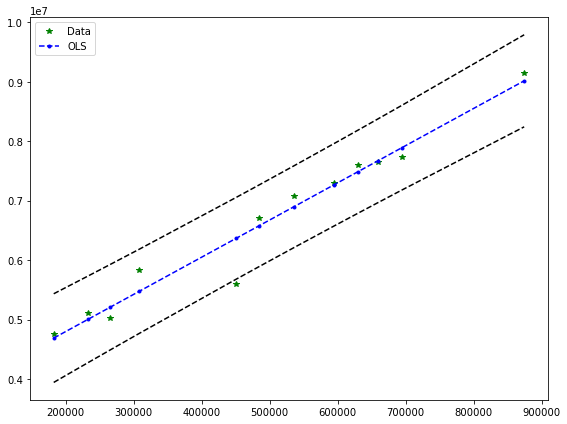

In [7]:
pred_ols = results.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"]
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(X, y, "*", label="Data", color="g")
ax.plot(X, results.fittedvalues, "b--.", label="OLS")
ax.plot(X, iv_u, "k--")
ax.plot(X, iv_l, "k--")
ax.legend(loc="best")

plt.tight_layout()
plt.savefig('regression_09.png', dpi=300)  